In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import os
import warnings
warnings.filterwarnings("ignore")

In [5]:
filename = "250317_All_Data.csv"
# Load the CSV file into a dataframe
df = pd.read_csv(f'Figure_Data/{filename}')

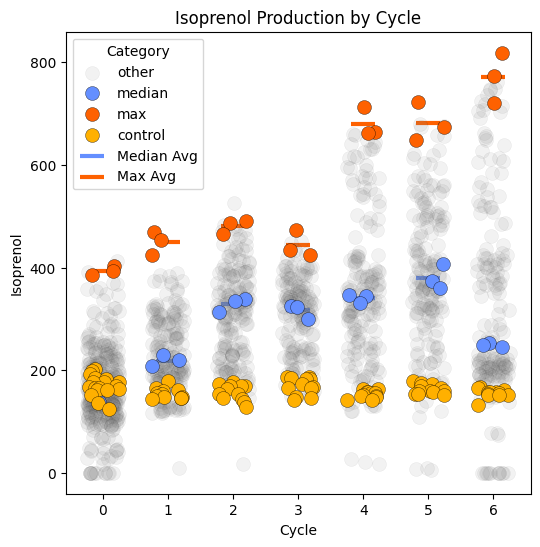

In [6]:
# Conditions for "median" and "max"
# median_conditions = {
#     0: ['PP_0597'],
#     1: ['PP_0658_PP_2136'],
#     2: ['PP_0368_PP_4189'],
#     3: ['PP_0368_PP_0528_PP_4191'],
#     4: ['PP_0751_PP_0814_PP_4192'],
#     5: ['PP_0812_PP_2136'],
#     6: ['PP_0815_PP_4191']
# }

median_conditions = {
    0: ['PP_1444'],	
    1: ['PP_2112_PP_2136_PP_4678'],	
    2: ['PP_0368_PP_0528_PP_4191'],	
    3: ['PP_0528_PP_0813_PP_4191'],	
    4: ['PP_0368_PP_0528'],	
    5: ['PP_0528_PP_0813'],	
    6: ['PP_0368_PP_0815_PP_1769']}


max_conditions = {
    0: ['PP_0528'],
    1: ['PP_0815_PP_1317'],
    2: ['PP_0751_PP_0814'],
    3: ['PP_0528_PP_0813_PP_0815_PP_1317'],
    4: ['PP_0368_PP_0812_PP_0815'],
    5: ['PP_0368_PP_0751_PP_0815'],
    6: ['PP_0751_PP_0813_PP_0815']}

# Function to determine color
def determine_color(row):
    if row['line_name_norep'] in median_conditions.get(row['cycle'], []):
        return 'median'
    elif row['line_name_norep'] in max_conditions.get(row['cycle'], []):
        return 'max'
    elif row['is_control']:
        return 'control'
    else:
        return 'other'

# Apply the function to the dataframe
df['color'] = df.apply(determine_color, axis=1)

# Create the strip plot
plt.figure(figsize=(6, 6))

# Plot the "other" points first
sns.stripplot(data=df[df['color'] == 'other'], x='cycle', y='isoprenol', color='gray', edgecolor='black', alpha = 0.1, linewidth= 0.25,jitter=0.25, size=10, label='other')

# Plot the "median" points
sns.stripplot(data=df[df['color'] == 'median'], x='cycle', y='isoprenol', color='#648FFF', edgecolor='black', linewidth= 0.25, jitter=0.25, size=10, label='median')

# Plot the "max" points
sns.stripplot(data=df[df['color'] == 'max'], x='cycle', y='isoprenol', color='#FE6100', edgecolor='black', jitter=0.25, linewidth= 0.25,size=10, label='max')

# Plot the "control" points
sns.stripplot(data=df[df['color'] == 'control'], x='cycle', y='isoprenol', color='#FFB000', edgecolor='black', jitter=0.25, linewidth= 0.25,size=10, label='control')

# Calculate and plot the average of the "max" and "median" values for each cycle
for cycle in df['cycle'].unique():
    cycle_data = df[df['cycle'] == cycle]
    
    # Calculate average for "median"
    median_data = cycle_data[cycle_data['color'] == 'median']
    if not median_data.empty:
        median_avg = median_data['isoprenol'].mean()
        plt.scatter(cycle, median_avg, color='#648FFF', marker='_', edgecolors='black',linewidths=3, s=300,  label='Median Avg' if cycle == df['cycle'].unique()[0] else "")
    
    # Calculate average for "max"
    max_data = cycle_data[cycle_data['color'] == 'max']
    if not max_data.empty:
        max_avg = max_data['isoprenol'].mean()
        plt.scatter(cycle, max_avg,color='#FE6100', marker='_', edgecolors='black',  s=300, linewidths=3, label='Max Avg' if cycle == df['cycle'].unique()[0] else "")

# Customize the plot
plt.title('Isoprenol Production by Cycle')
plt.xlabel('Cycle')
plt.ylabel('Isoprenol')

# Create a custom legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Category')

# Save the plot
plt.savefig('Figure_Export/Figure_1D.pdf', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()